### Financial News and Stock Price Sentiment and correlation Analysis

  ###      Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import talib as tl
import plotly.express as pe

## Load Historical Data and News data

In [2]:
news_data=pd.read_csv('../docs/raw_analyst_ratings.csv')

In [3]:
import sys
sys.path.append('..')
# import os
# current_dir = os.getcwd()
# parrent_dir = os.path.dirname(current_dir)
# sys.path.insert(0,parrent_dir)
from scripts.financialAnalysis import loadHistoricalData

In [4]:
news_data = pd.DataFrame(news_data)

### Exploratory Data Analysis (EDA)

#### Print News Dataset

In [5]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Find size of news data

In [6]:
news_data.shape

(1407328, 6)

### News Dataset have no a missing value

In [7]:
news_data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

## Descriptive Statistics no News Dataset

### Headline length of news data

In [8]:
headline_lengths = news_data['headline'].apply(len)


In [9]:
headline_lengths.head(20)

0      39
1      42
2      29
3      44
4      87
5      71
6      73
7     120
8      84
9      42
10     47
11     84
12     49
13    120
14     94
15     35
16     78
17     81
18     88
19     68
Name: headline, dtype: int64

### Find Mean, Median, Mode, Minimum and Maximum of News data headline

In [10]:
np.round(headline_lengths.describe(),2) 


count    1407328.00
mean          73.12
std           40.74
min            3.00
25%           47.00
50%           64.00
75%           87.00
max          512.00
Name: headline, dtype: float64

### Number of published articles in specific date


In [11]:
publisher_date_counts = news_data['date'].value_counts()
publisher_date_counts.head(20)

2020-03-12 00:00:00    1766
2020-02-27 00:00:00    1292
2020-02-28 00:00:00    1239
2019-08-01 00:00:00    1228
2020-03-06 00:00:00    1147
2018-08-02 00:00:00    1138
2009-08-10 00:00:00    1130
2018-10-30 00:00:00    1129
2018-07-26 00:00:00    1125
2019-07-31 00:00:00    1116
2019-08-07 00:00:00    1114
2020-03-11 00:00:00    1102
2018-11-01 00:00:00    1101
2018-08-08 00:00:00    1089
2020-04-15 00:00:00    1067
2019-11-07 00:00:00    1065
2018-08-01 00:00:00    1062
2020-03-09 00:00:00    1052
2020-01-22 00:00:00    1048
2020-01-21 00:00:00    1046
Name: date, dtype: int64

### Time Series Analysis

/home/osho/Projects/10AcadameyWeek1Analysis/.venv/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<Axes: title={'center': 'number of published article in specific date'}, xlabel='Year', ylabel='number of publisher'>

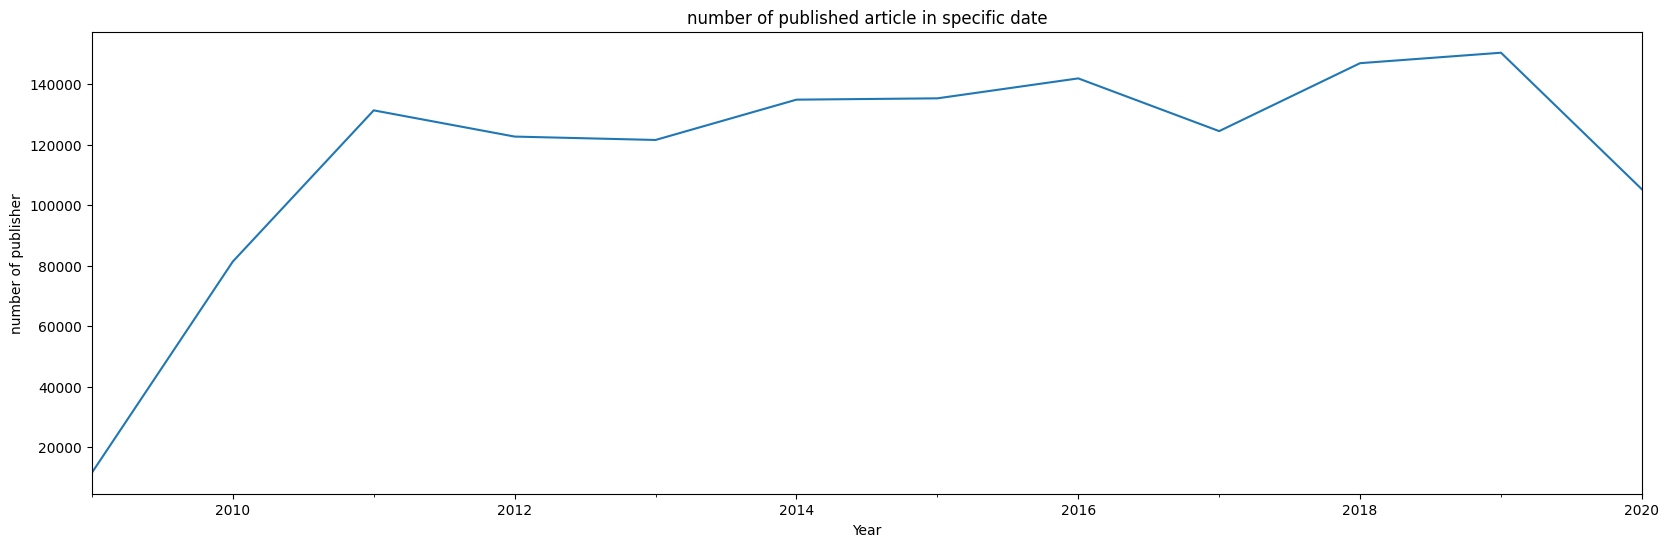

In [12]:
news_data['date'] = pd.to_datetime(news_data['date'], utc=True)

# news_data['date'].dt.to_period('M').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')

news_data['date'].dt.to_period('Y').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')

# There seem to be specific peak periods where the number of published articles significantly increases. Identifying these periods can provide insights into factors driving the surge in publications.

### Sentiment analysis 

#### Calculate sentiment analysis on news headline using TexBlob 

In [13]:
from scripts.financialAnalysis import get_sentiment

news_data['sentiment_score'] = news_data['headline'].apply(get_sentiment)


Display calculated sentiment for each headline

In [14]:
news_data.head()


,Unnamed: 0,headline,url,publisher,date,stock,sentiment_score
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,0.0


### Convert >0 into positive, <0 into negative and 0 into neutral

In [15]:
news_data['sentiment_score_word'] = news_data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))


In [16]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_score,sentiment_score_word
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,0.0,neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,0.0,neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,0.0,neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,0.0,neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,0.0,neutral


### Sentiment score with respect to date

<Axes: xlabel='date'>

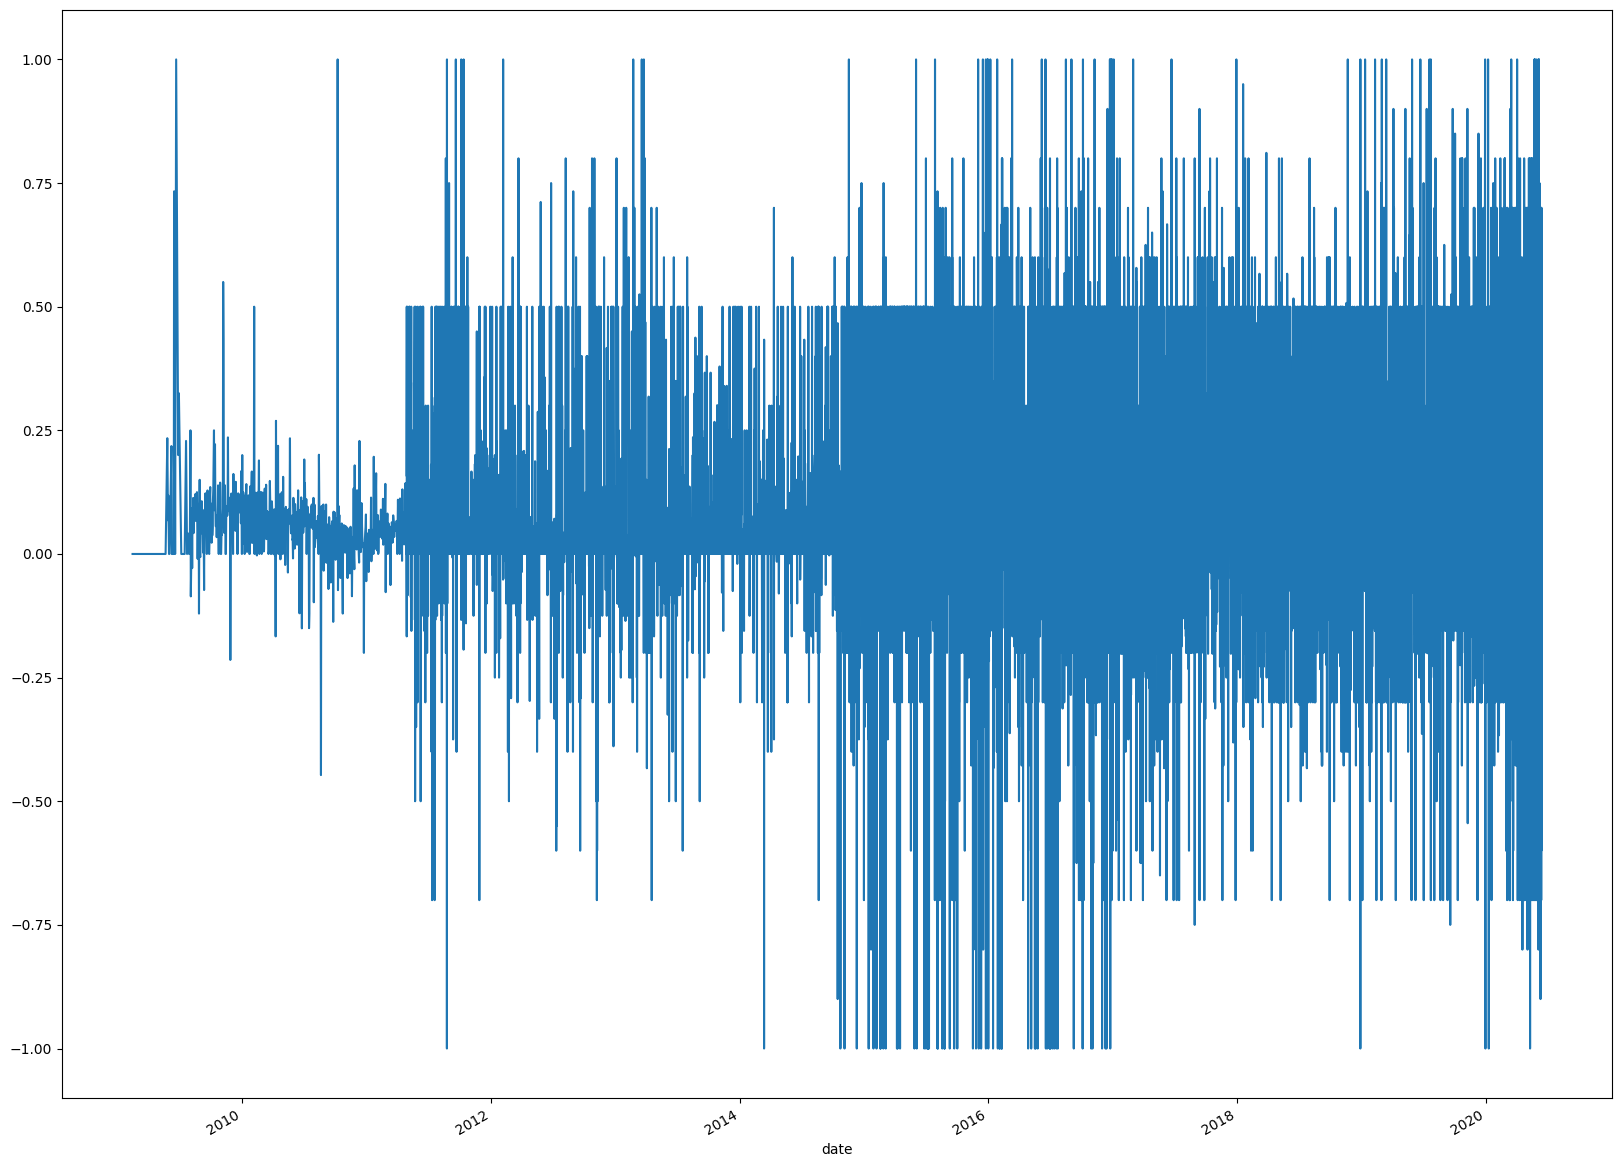

In [60]:
news_data.groupby('date')['sentiment_score'].mean().plot(figsize=(20,16))

### Number of Published articles with respect to sentiment categories 

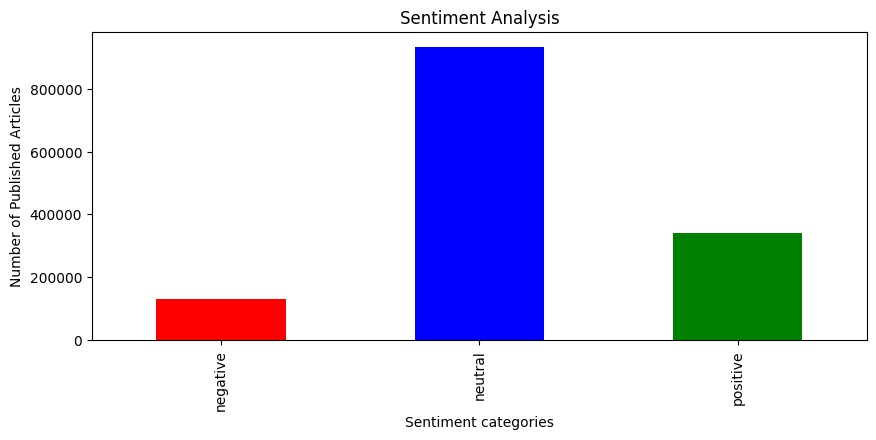

In [17]:
from scripts.financialAnalysis import numberOfArticlesWithSentimentAnalysis
numberOfArticlesWithSentimentAnalysis(news_data)

### Topic Modeling

In [18]:
# Create TF-IDF matrix
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(news_data['headline'])

# # Apply LDA
# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# lda.fit(X)

# # Print topics
# for topic_idx, topic in enumerate(lda.components_):
#     print("Topic #{}:".format(topic_idx))
#     print(" ".join([vectorizer.get_feature_names()[i]
#                    for i in topic.argsort()[:-5 - 1:-1]]))

## Publisher Analysis

### Number of articles per publisher

### Show top 20 publisher by number of published articles

In [19]:
publisher_counts = news_data['publisher'].value_counts()
publisher_counts.head(20)

Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: publisher, dtype: int64

### Show last 20 publisher by number of published articles

In [20]:
publisher_counts.tail(20)

Joseph Trevisani                   1
Alex Roslin                        1
Economic Burn                      1
joreal2479                         1
Hasan Saleem                       1
Vuru                               1
The Professor                      1
Allan Farley                       1
Bruno del Ama                      1
CannabisFN                         1
Brian Dolan                        1
Happy Trading                      1
Howie Bick                         1
MelissaBurns                       1
Growth Aces                        1
Shazir Mucklai - Imperium Group    1
Laura Jennings                     1
Eric Martin                        1
Jose Rodrigo                       1
Jeremie Capron                     1
Name: publisher, dtype: int64

### Sentiment analysis for Top Three publisher

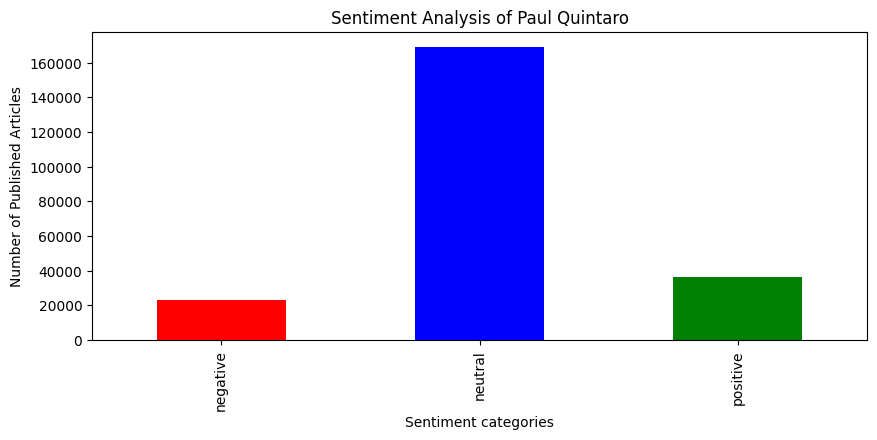

In [21]:
from scripts.financialAnalysis import getSentimentAnalysisOfPublisher
getSentimentAnalysisOfPublisher(news_data,'Paul Quintaro')

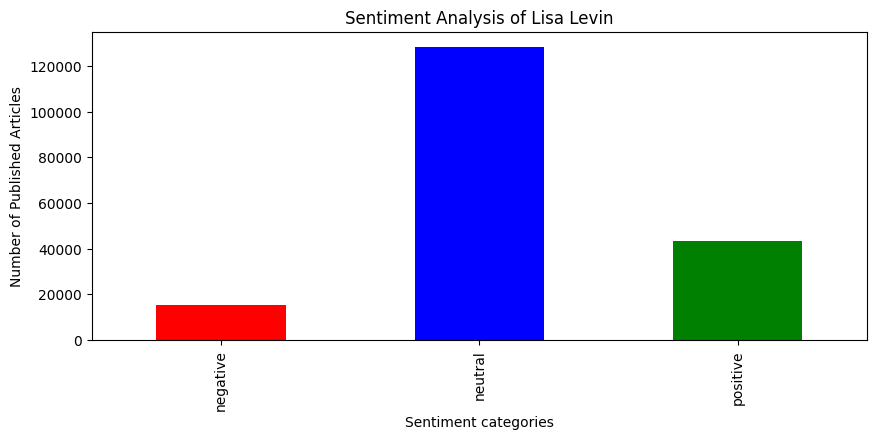

In [22]:
getSentimentAnalysisOfPublisher(news_data,'Lisa Levin')

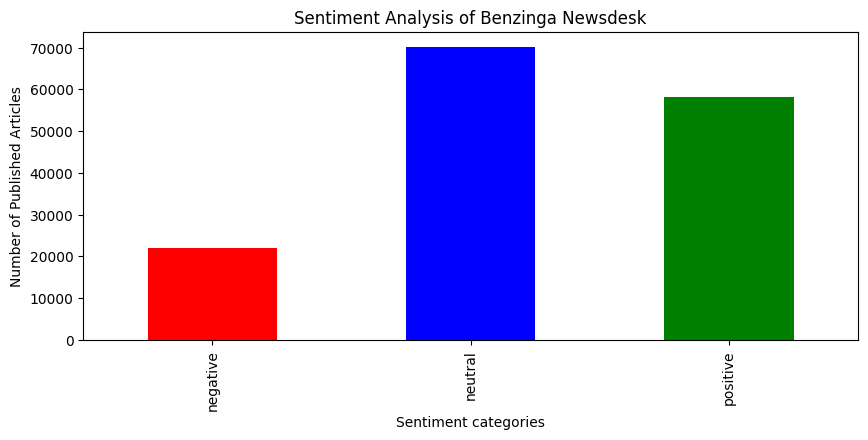

In [23]:
getSentimentAnalysisOfPublisher(news_data,'Benzinga Newsdesk')

### Type of news publisher published (positive, neutral, negative)

### Averagicaly types of publisher published

In [24]:
publisher_sentiment = news_data.groupby('publisher')['sentiment_score'].mean().sort_index()
publisher_sentiment.head(20)

publisher
47ertrends            0.000000
AARP                  0.012755
ABNNewswire          -0.027816
Aakin                 0.207273
Aaron Jackson.Ed      0.485417
Aaron Levitt          0.050665
Abe Raymond           0.028575
Abhi Rao              0.034365
Abigail Field         0.063021
Above Average Odds    0.144357
Accointing            0.000000
Activist Stocks       0.025482
Adam Gefvert          0.266667
Adam Parker          -0.008000
Adam Sarhan           0.000000
Adam Weiner           0.000000
Alan Brochstein       0.025000
Alex Biles            0.120288
Alex Cho              0.068991
Alex Furno            0.074715
Name: sentiment_score, dtype: float64

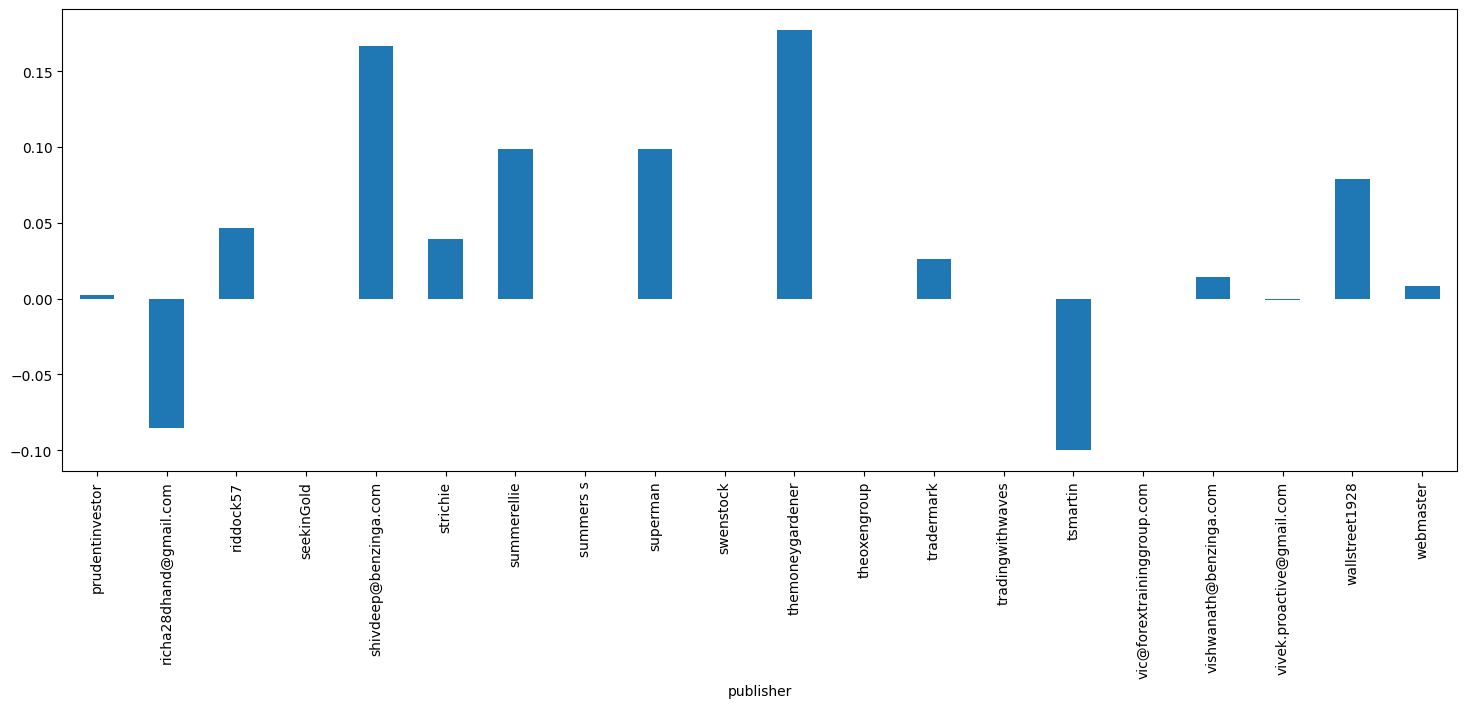

In [25]:
publisher_sentiment.tail(20).plot(kind='bar',figsize=(18,6))
plt.show()

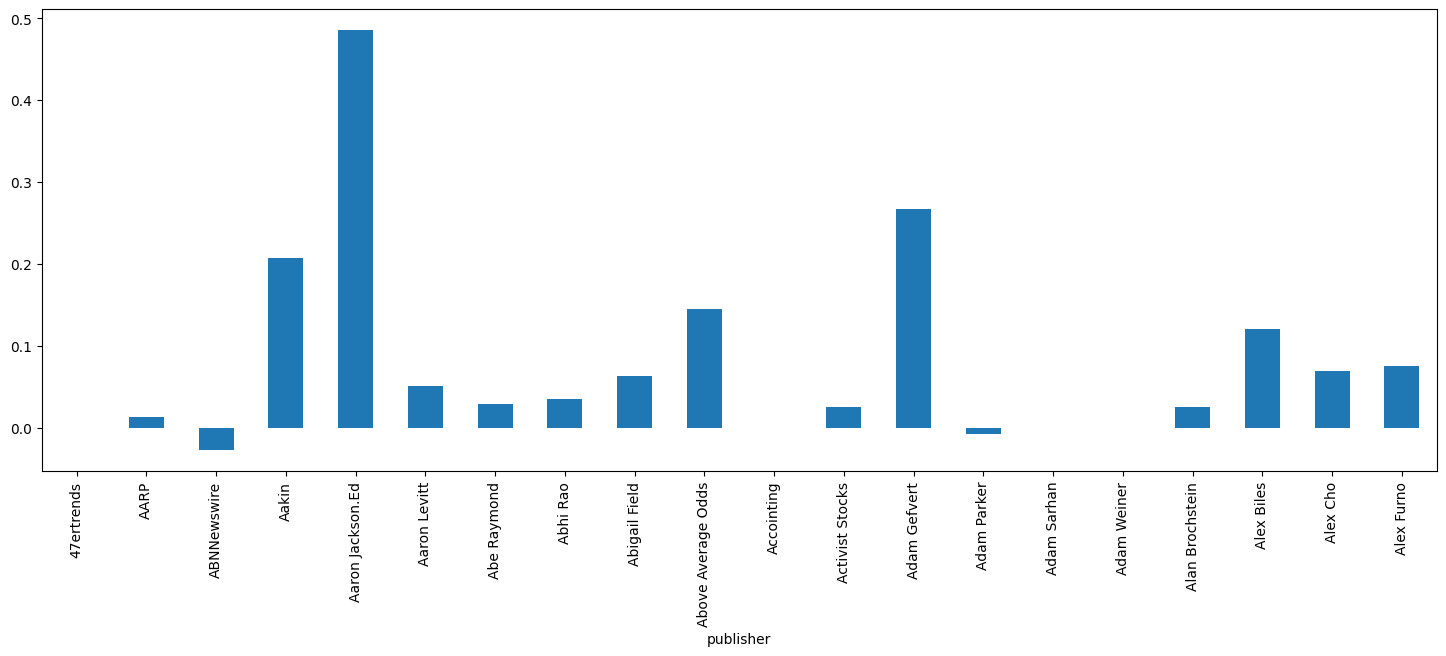

In [26]:
publisher_sentiment.head(20).plot(kind='bar',figsize=(18,6))  # Replace 'line' with 'bar', 'scatter', or other plot types as needed
plt.show()

### Quantitative analysis of Historical data using pynance and TaLib

### stock price data

### Historical Data of AAPL:

In [27]:
stock_data_aapl = pd.DataFrame(loadHistoricalData('AAPL'))
stock_data_aapl.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0


### Historical Data of GOOG:

In [28]:
stock_data_goog = pd.DataFrame(loadHistoricalData('GOOG'))
stock_data_goog.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0
5,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401,0.0,0.0
6,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132,0.0,0.0
7,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.537839,104429967,0.0,0.0
8,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.546795,98825037,0.0,0.0
9,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.494053,183633734,0.0,0.0


### Historical Data of AMZN:

In [29]:
stock_data_amzn = pd.DataFrame(loadHistoricalData('AMZN'))
stock_data_amzn.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
5,1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000,0.0,0.0
6,1997-05-23,0.070313,0.076042,0.066667,0.075000,0.075000,318744000,0.0,0.0
7,1997-05-27,0.075521,0.082292,0.072917,0.079167,0.079167,173952000,0.0,0.0
8,1997-05-28,0.081250,0.081771,0.076563,0.076563,0.076563,91488000,0.0,0.0
9,1997-05-29,0.077083,0.077083,0.073958,0.075260,0.075260,69456000,0.0,0.0


### Historical Data of META:

In [30]:
stock_data_meta = pd.DataFrame(loadHistoricalData('META'))
stock_data_meta.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0
5,2012-12-19,27.830000,28.219999,26.950001,27.410000,27.353790,61390300,0.0,0.0
6,2012-12-20,27.490000,27.600000,27.129999,27.360001,27.303892,35574800,0.0,0.0
7,2012-12-21,26.660000,27.010000,26.120001,26.260000,26.206148,54555200,0.0,0.0
8,2012-12-24,26.500000,26.959999,26.200001,26.930000,26.874775,28230100,0.0,0.0
9,2012-12-26,27.030001,27.180000,26.379999,26.510000,26.455635,33175400,0.0,0.0


### Historical Data of MSFT:

In [31]:
stock_data_msft = pd.DataFrame(loadHistoricalData('MSFT'))
stock_data_msft.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.058876,58435200,0.0,0.0
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.057270,59990400,0.0,0.0
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.055665,65289600,0.0,0.0
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.056735,32083200,0.0,0.0
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.058341,22752000,0.0,0.0


### Historical Data of NVDA:

In [32]:
stock_data_nvda = pd.DataFrame(loadHistoricalData('NVDA'))
stock_data_nvda.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0
5,1999-01-29,0.041536,0.041667,0.039583,0.039583,0.036307,244032000,0.0,0.0
6,1999-02-01,0.039583,0.040625,0.039583,0.040365,0.037024,154704000,0.0,0.0
7,1999-02-02,0.039583,0.040625,0.036068,0.037240,0.034158,264096000,0.0,0.0
8,1999-02-03,0.036719,0.038542,0.036458,0.038021,0.034874,75120000,0.0,0.0
9,1999-02-04,0.038542,0.041146,0.038021,0.040104,0.036784,181920000,0.0,0.0


### Historical Data of TSLA:

In [33]:
stock_data_tsla = pd.DataFrame(loadHistoricalData('TSLA'))
stock_data_tsla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0
5,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,0.0,0.0
6,2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,0.0,0.0
7,2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,0.0,0.0
8,2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,0.0,0.0
9,2010-07-13,1.159333,1.242667,1.126667,1.209333,1.209333,40201500,0.0,0.0


### Apply EDA for stock price

#### Check missing values

In [34]:
from scripts.financialAnalysis import checkMissingValueOfHistoricalDataset
checkMissingValueOfHistoricalDataset(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,stock_data_tsla)

### Calculate descriptive statistics of Historical data

In [35]:
from tabulate import tabulate
from scripts.financialAnalysis import calculateDescriptiveStatisticsOfHistoricalData
statisticsOfHistoricalData = calculateDescriptiveStatisticsOfHistoricalData(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,stock_data_tsla)
print(tabulate(statisticsOfHistoricalData, headers='keys', tablefmt='psql'))

+-------+--------------+------------+-------------+-------------+-----------+-------------+------------+
|       |         AAPL |       GOOG |        AMZN |        MSFT |      META |        NVDA |       TSLA |
|-------+--------------+------------+-------------+-------------+-----------+-------------+------------|
| count | 10998        | 5020       | 6846        | 9672        | 2926      | 6421        | 3545       |
| mean  |    22.3128   |   45.2745  |   37.3511   |   58.4177   |  179.649  |    6.2077   |   75.4873  |
| std   |    46.0377   |   43.3773  |   53.7299   |   90.1468   |  108.907  |   16.1185   |  102.457   |
| min   |     0.049107 |    2.49091 |    0.069792 |    0.090278 |   22.9    |    0.034115 |    1.05333 |
| 25%   |     0.298549 |   13.0321  |    2.07675  |    5.69531  |   97.3825 |    0.27675  |   11.5653  |
| 50%   |     0.53125  |   27.0059  |    8.5915   |   27.3419   |  166.855  |    0.457    |   17.4593  |
| 75%   |    20.1962   |   60.2803  |   50.4265   |   4

### Change date format

In [36]:
stock_data_aapl['Date']=pd.to_datetime(stock_data_aapl['Date'])
stock_data_goog['Date']=pd.to_datetime(stock_data_goog['Date'])
stock_data_amzn['Date']=pd.to_datetime(stock_data_amzn['Date'])
stock_data_msft['Date']=pd.to_datetime(stock_data_msft['Date'])
stock_data_nvda['Date']=pd.to_datetime(stock_data_nvda['Date'])
stock_data_meta['Date']=pd.to_datetime(stock_data_meta['Date'])
stock_data_tsla['Date']=pd.to_datetime(stock_data_tsla['Date'])


#### How the stock price goes with respect to time

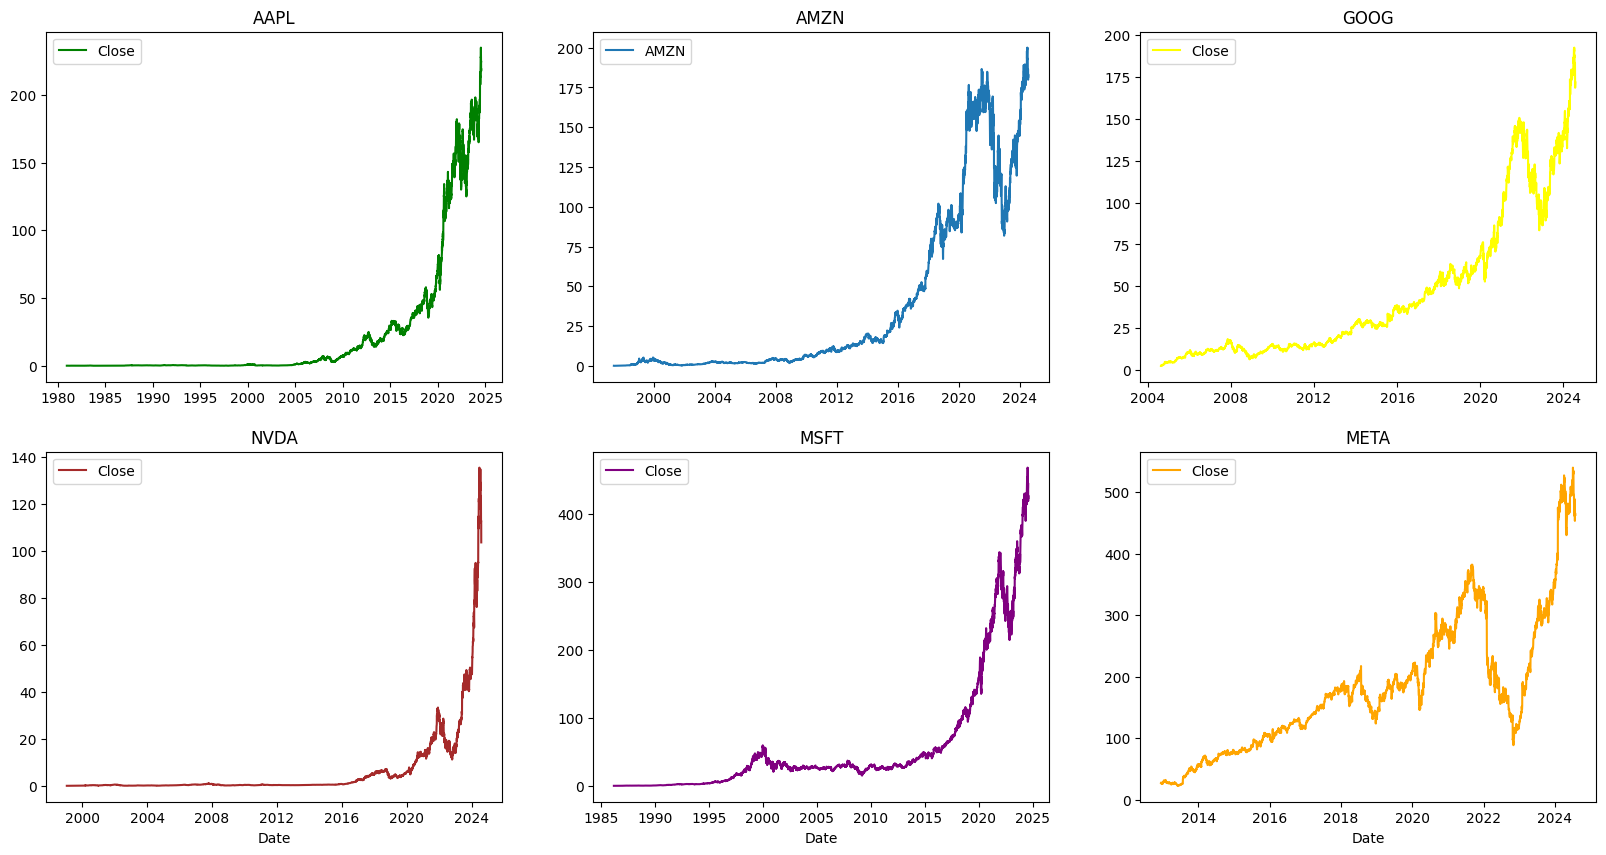

In [37]:
from scripts.financialAnalysis import analysisClosingPriceWithDate
analysisClosingPriceWithDate(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda)

### TA-Lib - Technical Analysis

## Calculate technical indicators

In [38]:
from scripts.financialAnalysis import calculateTechnicalIndicator

### Calculate technical indicator of AAPL:

In [39]:
calculateTechnicalIndicator(stock_data_aapl)
stock_data_aapl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,48.687742,222.376929,6.678882,4.662717
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,47.386437,221.911508,6.092722,3.748082
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,48.055700,221.535174,5.479431,3.026267
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,48.476184,221.221349,4.873263,2.448591
10997,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,225.117001,49.359115,220.990744,4.301163,2.012764


### Calculate technical indicator of AMZN:

In [40]:
calculateTechnicalIndicator(stock_data_amzn)
stock_data_amzn.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,192.8900,37.221397,189.093555,0.635114,-1.342010
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,192.2020,36.132394,188.213217,0.132395,-1.878483
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,191.4345,41.146719,187.669101,-0.307283,-2.065994
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,190.9320,42.432437,187.243472,-0.672530,-2.133520
6845,2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600,0.0,0.0,190.1575,40.408843,186.716476,-0.994218,-2.280971


### Calculate technical indicator of GOOG:

In [41]:
calculateTechnicalIndicator(stock_data_goog)
stock_data_goog.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
5015,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,185.500001,37.434718,183.080916,1.571016,-0.034166
5016,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,184.689501,32.279082,181.755115,1.035474,-1.106693
5017,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,183.780501,31.843937,180.509865,0.433845,-1.972672
5018,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0,183.166001,36.545844,179.616545,-0.139569,-2.433223
5019,2024-07-30,171.830002,172.949997,170.119995,171.860001,171.860001,13681400,0.0,0.0,182.534501,37.920068,178.877827,-0.653273,-2.708091


### Calculate technical indicator of MSFT:

In [42]:
calculateTechnicalIndicator(stock_data_msft)
stock_data_msft.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0,451.887498,36.980921,446.197526,3.013510,-0.684986
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0,450.199498,31.696381,443.550142,1.862718,-2.740453
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0,448.820497,37.944660,441.809175,0.735855,-3.771598
9670,2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0,447.809497,39.217239,440.373064,-0.295321,-4.420024
9671,2024-07-30,427.720001,429.049988,417.359985,422.920013,422.159119,32687600,0.0,0.0,446.118997,37.080269,438.710869,-1.272579,-5.181612


### Calculate technical indicator of NVDA:

In [43]:
calculateTechnicalIndicator(stock_data_nvda)
stock_data_nvda.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
6416,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0,124.9165,41.589800,123.060740,1.879233,-0.007652
6417,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0,124.2105,39.943932,122.034003,1.339824,-0.817813
6418,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0,123.6640,40.940507,121.179336,0.795656,-1.381013
6419,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0,123.0665,39.606589,120.266065,0.251767,-1.923793
6420,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,0.0,0.0,122.0380,33.349720,118.691202,-0.389413,-2.954132


### Calculate technical indicator of META:

In [44]:
calculateTechnicalIndicator(stock_data_meta)
stock_data_meta.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
2921,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0,502.223499,36.964279,493.134155,-1.274374,-6.550694
2922,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0,499.237999,34.814669,489.350903,-2.781648,-8.810746
2923,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0,496.545000,40.628601,487.098437,-4.125446,-9.500635
2924,2024-07-29,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0,494.619499,40.633231,485.061442,-5.286773,-9.932081
2925,2024-07-30,467.000000,472.730011,456.700012,463.190002,463.190002,11390400,0.0,0.0,492.545000,39.789373,482.978448,-6.301008,-10.357947


### Calculate technical indicator of TSLA:

In [45]:
calculateTechnicalIndicator(stock_data_tsla)
stock_data_tsla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,237.924999,44.886918,233.501099,15.873789,11.789291
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,239.118999,46.951389,232.239089,14.569672,9.353206
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,240.238000,46.752165,231.054414,13.116159,7.302106
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,241.949000,52.664511,231.153995,11.811547,6.593101
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,242.587000,48.220474,230.341233,10.490485,5.206237


### Show Technical Indicators with Date

In [46]:
def showTechnicalIndicator(stock_data,ticker):
    if(f'{stock_data}'.find('aapl')):
        fig=pe.line(stock_data[ticker],stock_data['Date'], y=ticker, title=f'{ticker} AAPL')
        fig.show()

In [47]:
showTechnicalIndicator(stock_data_aapl,'SMA')

In [48]:

showTechnicalIndicator(stock_data_aapl,'RSI')

In [49]:
showTechnicalIndicator(stock_data_aapl,'MACD')

### Visual represent the relationship between technical indicators and closing price.

In [50]:
from scripts.financialAnalysis import technicalIndicatorsVsClosingPrice


### Closing Price vs. Simple Moving Average (SMA) Indicator

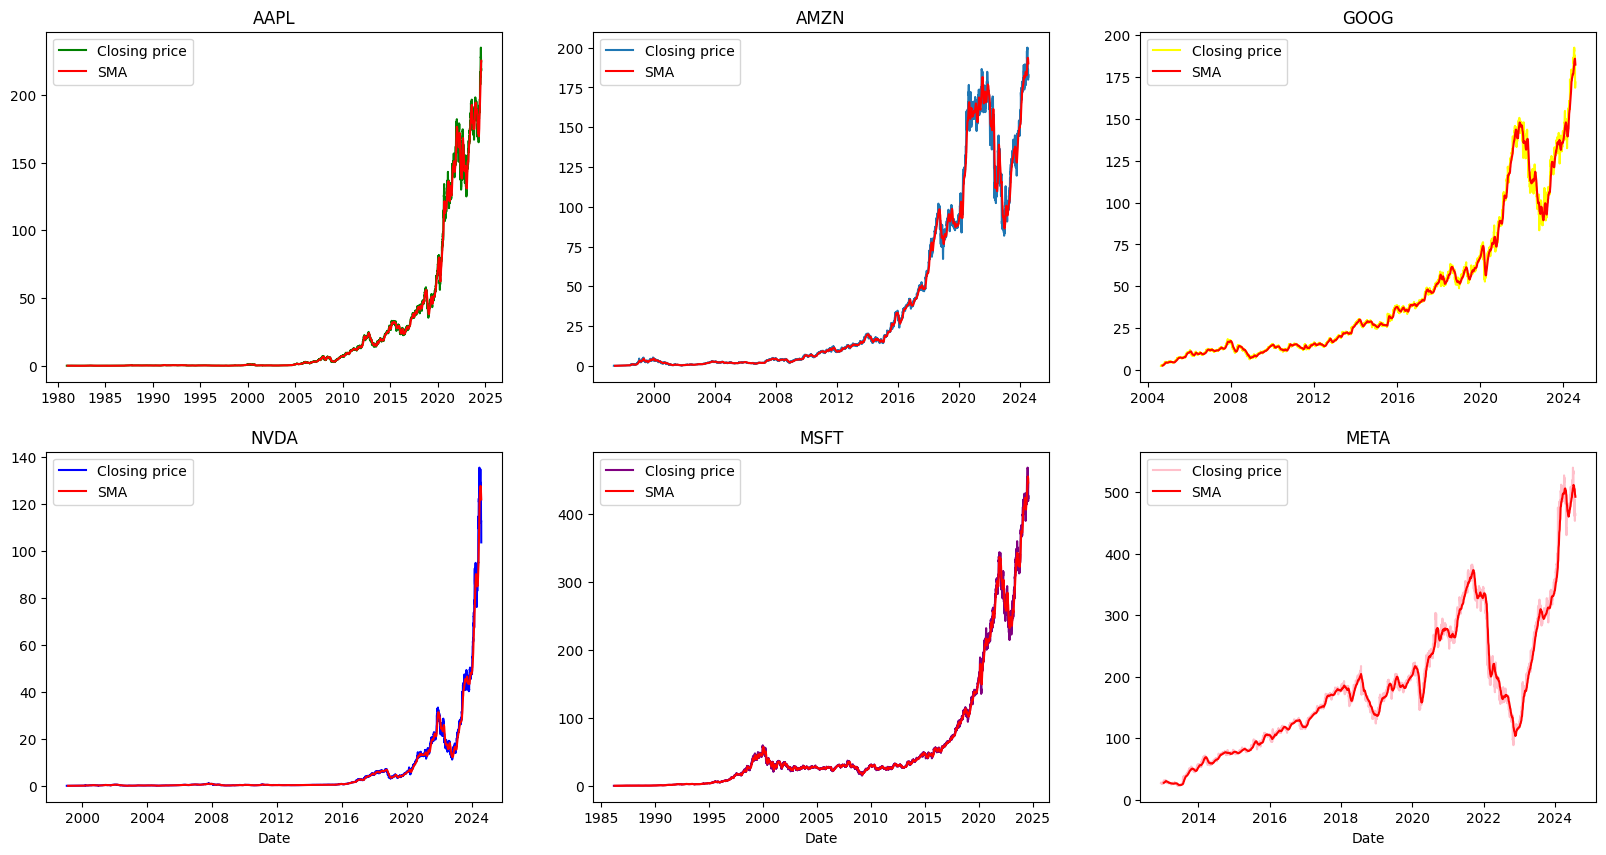

In [51]:
technicalIndicatorsVsClosingPrice(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,'SMA')
# Identifying trends, support and resistance levels. 
# A rising SMA suggests an uptrend, while a falling SMA indicates a downtrend.

### Closing Price vs. Exponential Moving Average (EMA) Indicator

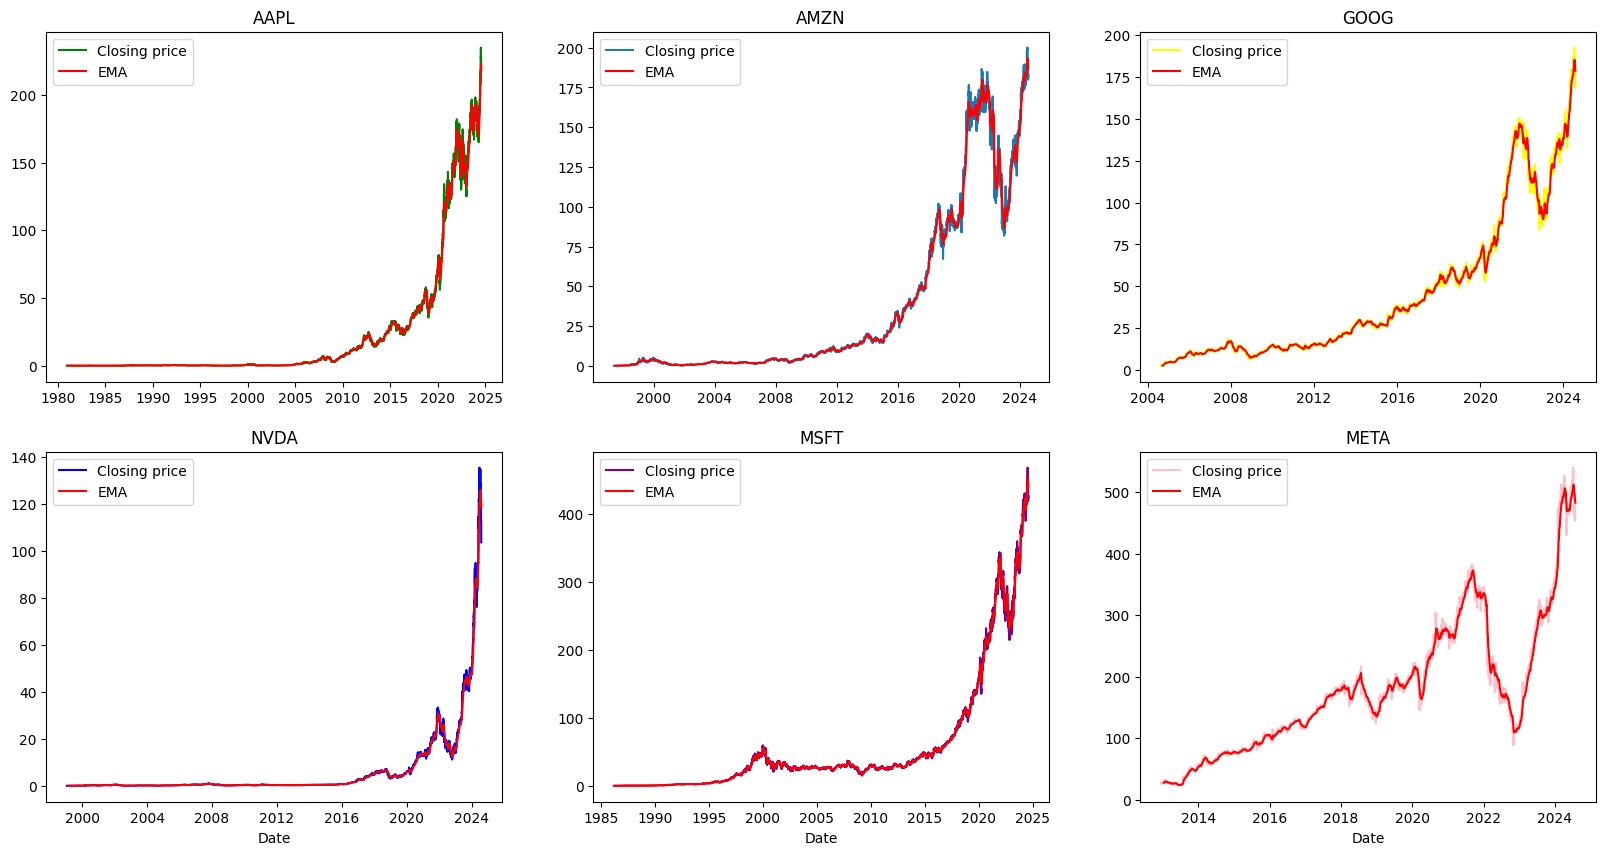

In [52]:
technicalIndicatorsVsClosingPrice(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,'EMA')
# Smoothing out price fluctuations and providing a more responsive indicator than SMA. 
# EMAs are often used to identify trend changes and potential reversals.

### Closing Price vs. Relative Strength Index(RSI) Indicator

/home/osho/Projects/10AcadameyWeek1Analysis/notebooks/../scripts/financialAnalysis.py:208: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



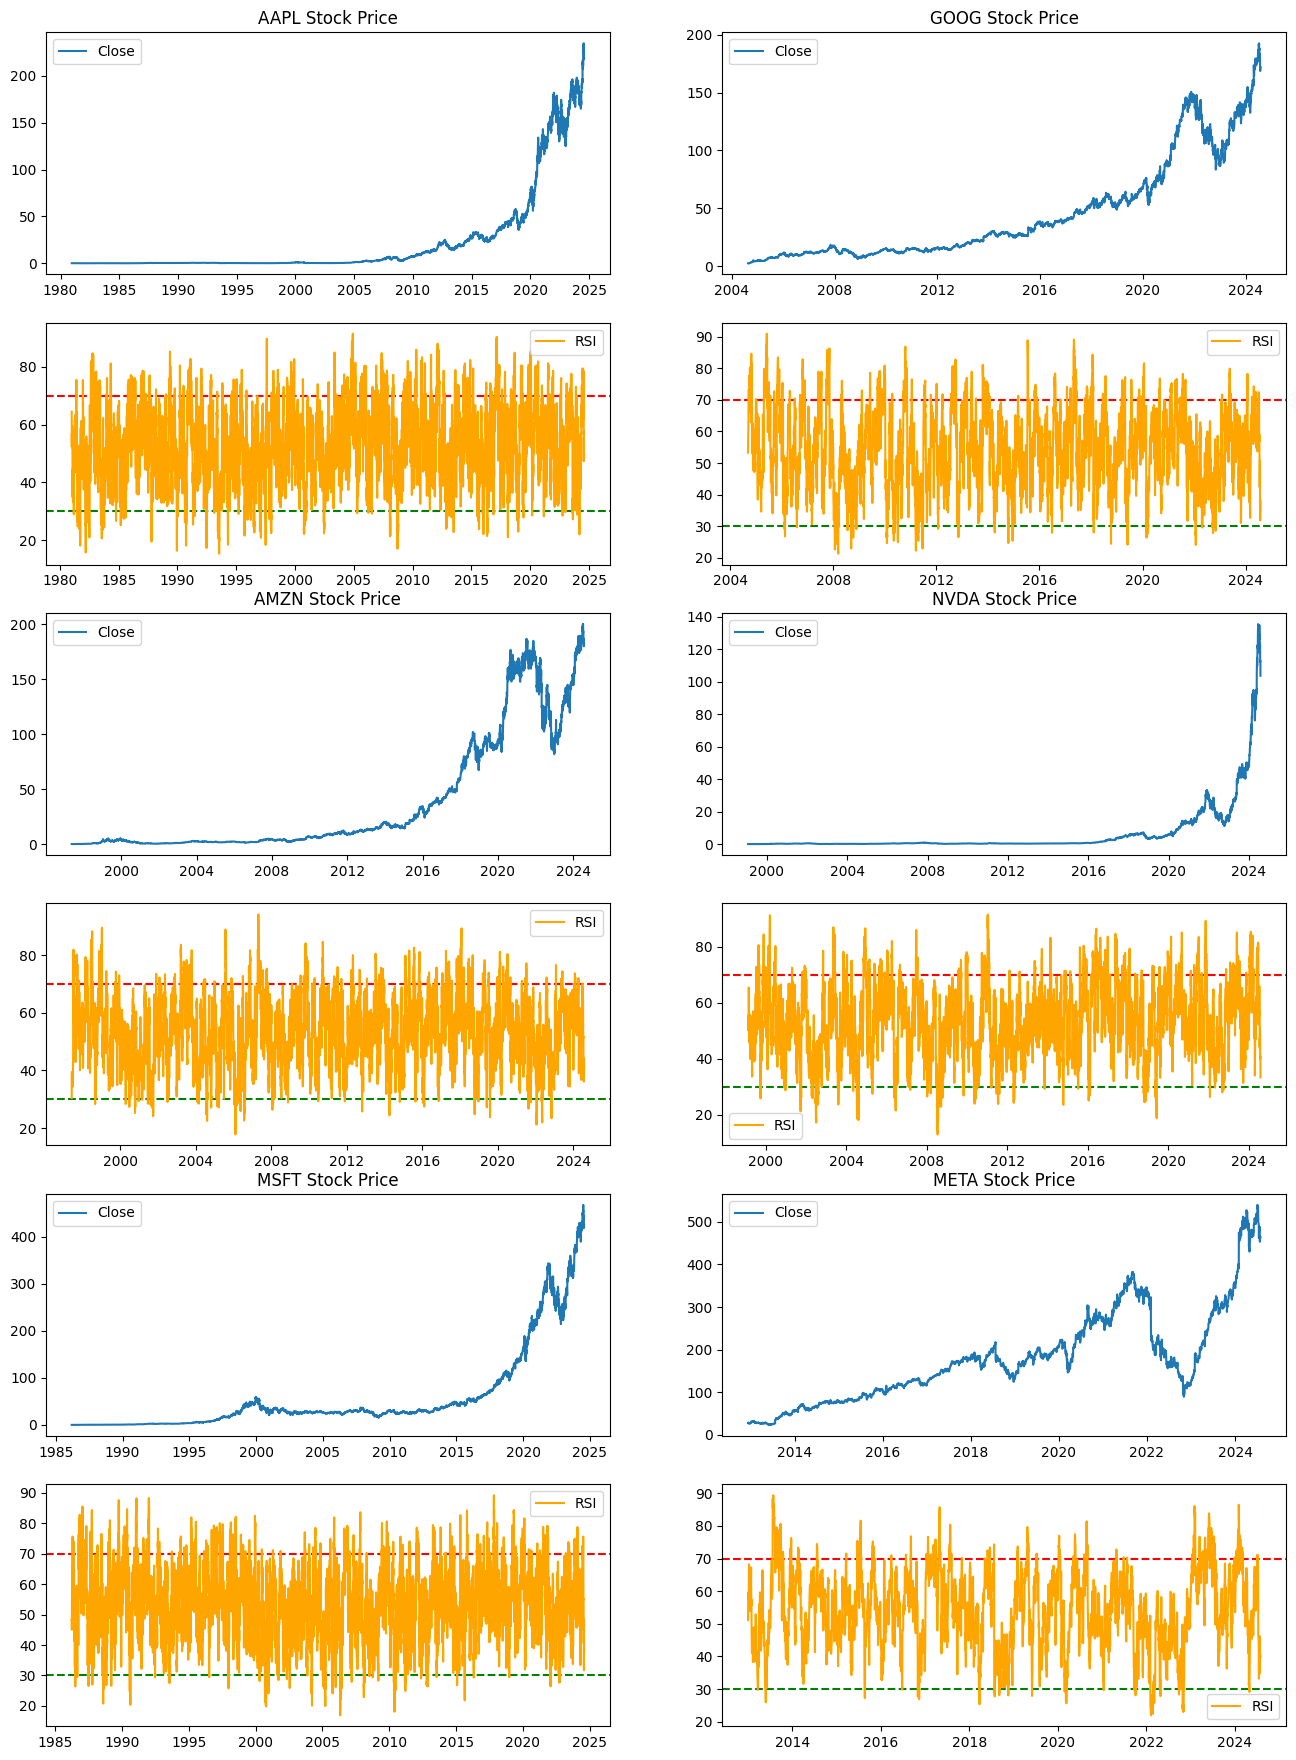

In [53]:
from scripts.financialAnalysis import closingPriceRelativeStrengthIndex
closingPriceRelativeStrengthIndex(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda)

### Closing Price vs. Moving Average Convergence Divergence (MACD) Indicator

/home/osho/Projects/10AcadameyWeek1Analysis/notebooks/../scripts/financialAnalysis.py:278: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



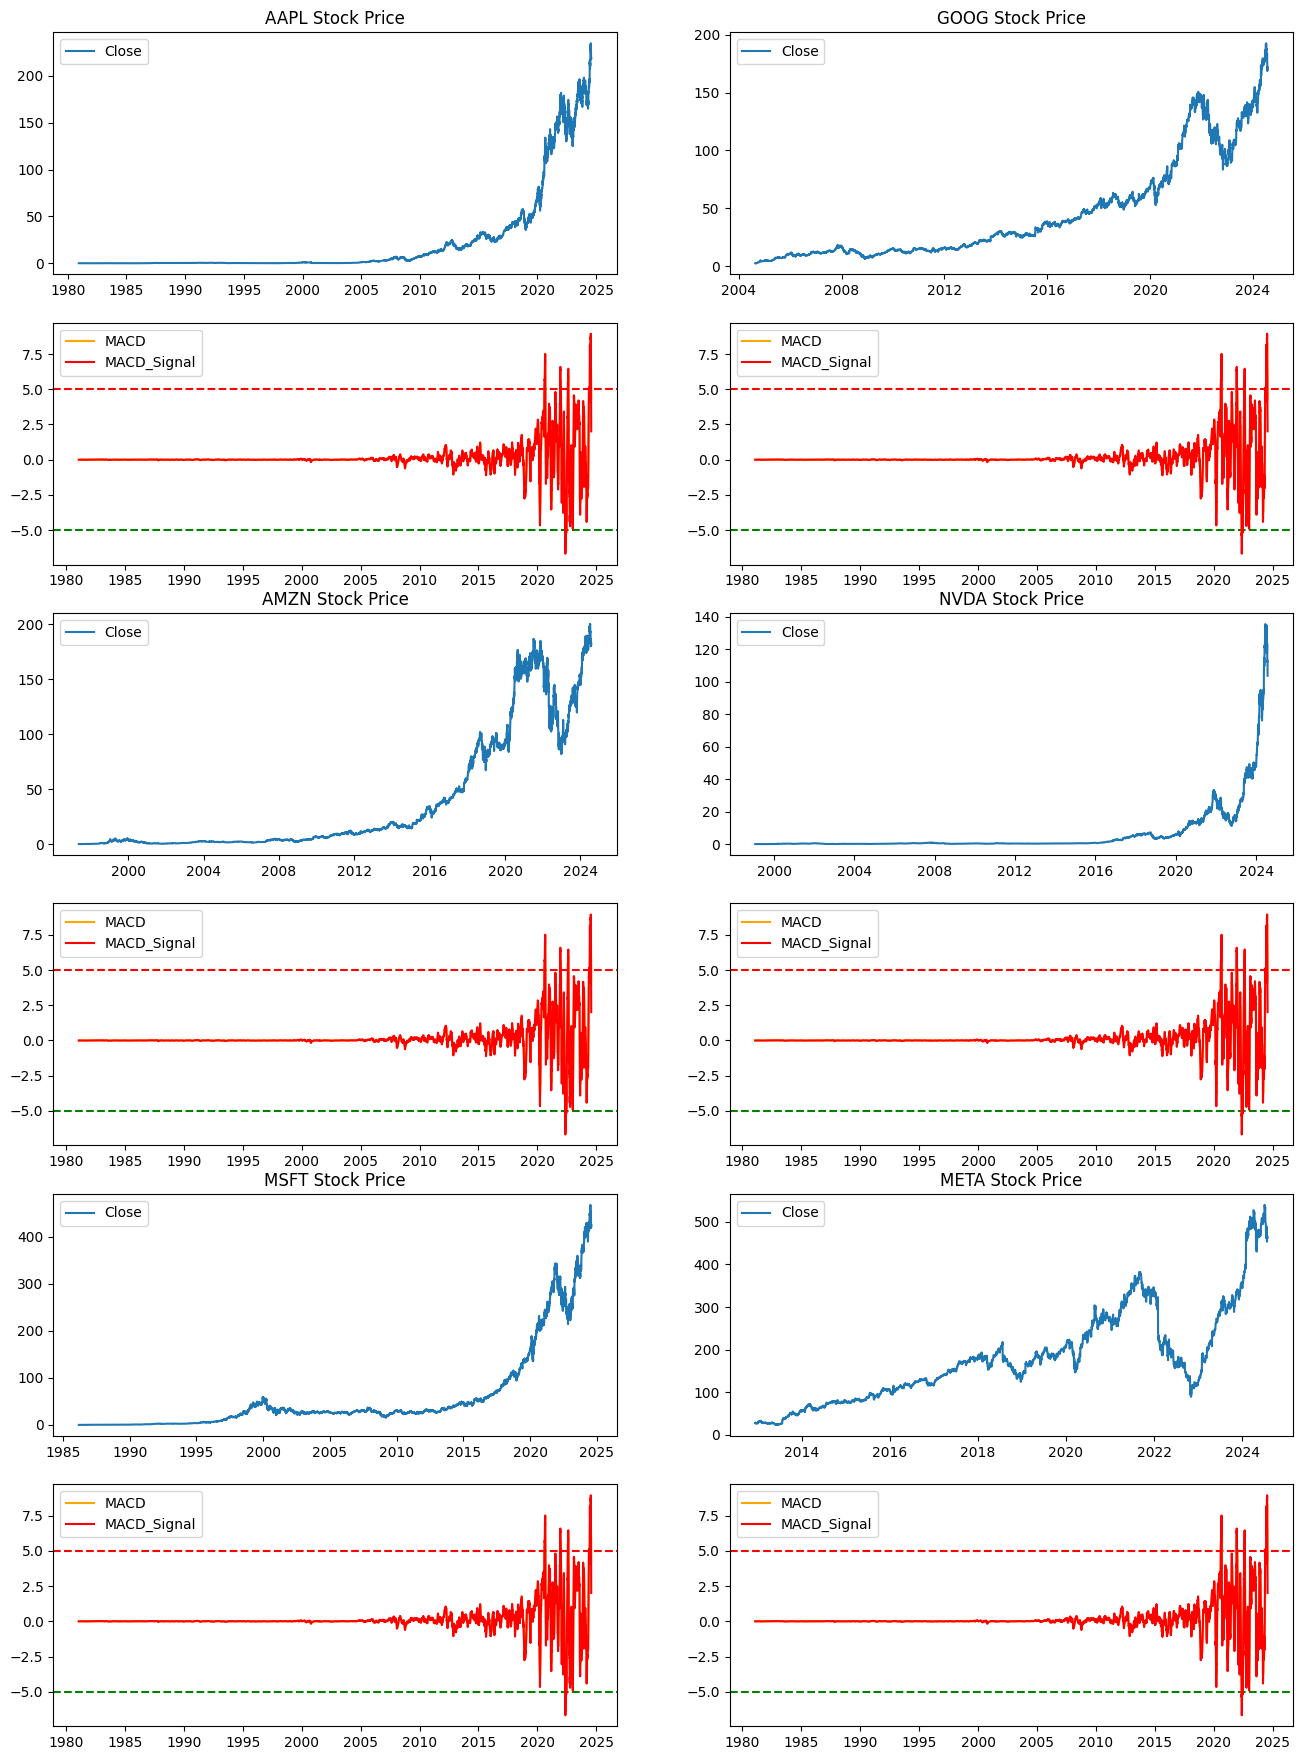

In [54]:
from scripts.financialAnalysis import closingPriceMovingAverageConvergenceDivergence
closingPriceMovingAverageConvergenceDivergence(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda)

### Financial Metrics (Portfolio analysis)

#### Between AAPL, AMZN, GOOG, META, MSFT, NVDA, TSLA

In [55]:
from scripts.financialAnalysis import calculatePortfolioWeightAndPerformance
calculatePortfolioWeightAndPerformance()

Portfolio Weights:
{'AAPL': 0.1, 'AMZN': 0.1, 'GOOG': 0.23, 'META': 0.23, 'MSFT': 0.09, 'NVDA': 0.13, 'TSLA': 0.11}

Portfolio Performance:
Expected annual return: 15.0%
Annual volatility: 12.4%
Sharpe Ratio: 1.05


# Correlation

In [72]:
new_stock_data_aapl = stock_data_aapl.rename(columns={'Date': 'date'})

In [76]:
news_data['date'] = news_data['date'].dt.tz_localize(None)
mergeStockAndNews = news_data.merge(new_stock_data_aapl, how='inner', on='date')

In [77]:
mergeStockAndNews.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_score,sentiment_score_word,Open,High,...,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
0,10,30 Stocks Moving in Friday's Pre-Market Session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,2020-05-22,A,0.0,neutral,78.942497,79.807503,...,79.722504,77.768188,81803200,0.0,0.0,75.899501,65.837603,76.062662,2.534267,2.647354
1,11,SVB Leerink Maintains Outperform on Agilent Te...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22,A,0.0,neutral,78.942497,79.807503,...,79.722504,77.768188,81803200,0.0,0.0,75.899501,65.837603,76.062662,2.534267,2.647354
2,7192,The Secret to Tech's Resilience to COVID-19- I...,https://www.benzinga.com/news/earnings/20/05/1...,IAM Newswire,2020-05-22,AAPL,-0.4,negative,78.942497,79.807503,...,79.722504,77.768188,81803200,0.0,0.0,75.899501,65.837603,76.062662,2.534267,2.647354
3,19285,The Daily Biotech Pulse: FDA Nod For Aquestive...,https://www.benzinga.com/general/biotech/20/05...,Shanthi Rexaline,2020-05-22,ACRX,0.0,neutral,78.942497,79.807503,...,79.722504,77.768188,81803200,0.0,0.0,75.899501,65.837603,76.062662,2.534267,2.647354
4,20678,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,ACTG,0.0,neutral,78.942497,79.807503,...,79.722504,77.768188,81803200,0.0,0.0,75.899501,65.837603,76.062662,2.534267,2.647354


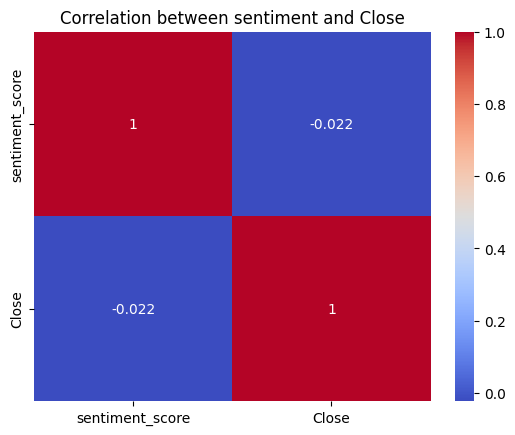

In [79]:
import seaborn as sns
correlation_matrix = mergeStockAndNews[['sentiment_score', 'Close']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between sentiment and Close')
plt.show()